# PQC Expressivity

In [8]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *
from quantum_circuits import *
from kraus_channels import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Three Qubits

In [3]:
print(pqc_basic(3, 3))

     ┌─────────────┐  ┌────────────┐      ┌────────────┐ ┌──────────────┐»
q_0: ┤ Ry(-1.2553) ├──┤ Rz(1.3526) ├───■──┤ Ry(2.3096) ├─┤ Rz(0.095385) ├»
     ├─────────────┤ ┌┴────────────┴┐┌─┴─┐└────────────┘┌┴──────────────┤»
q_1: ┤ Ry(0.93473) ├─┤ Rz(-0.87816) ├┤ X ├──────■───────┤ Ry(-0.070317) ├»
     ├─────────────┴┐├─────────────┬┘└───┘    ┌─┴─┐     └┬─────────────┬┘»
q_2: ┤ Ry(-0.46814) ├┤ Rz(-2.2867) ├──────────┤ X ├──────┤ Ry(-1.7583) ├─»
     └──────────────┘└─────────────┘          └───┘      └─────────────┘ »
«                        ┌──────────────┐┌─────────────┐                    »
«q_0: ────────────────■──┤ Ry(0.012312) ├┤ Rz(-1.6949) ├─────────────────■──»
«     ┌────────────┐┌─┴─┐└──────────────┘└┬────────────┤┌─────────────┐┌─┴─┐»
«q_1: ┤ Rz(2.8786) ├┤ X ├───────■─────────┤ Ry(1.3783) ├┤ Rz(0.28661) ├┤ X ├»
«     ├────────────┤└───┘     ┌─┴─┐      ┌┴────────────┤└┬────────────┤└───┘»
«q_2: ┤ Rz(1.9198) ├──────────┤ X ├──────┤ Ry(-1.2901) ├─┤ Rz(1.2226) ├─────»
«     └

In [4]:
n = 3
d = 2**n

np.random.seed(42)
random.seed(42)


bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list = []
for L in range(0, 11):
    fid_list = []
    for i in tqdm(range(10000)):
        U1 = Operator(pqc_basic(n, L)).data
        U2 = Operator(pqc_basic(n, L)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)
    
    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    
    KL_list.append(KL)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (11,) and (1,)

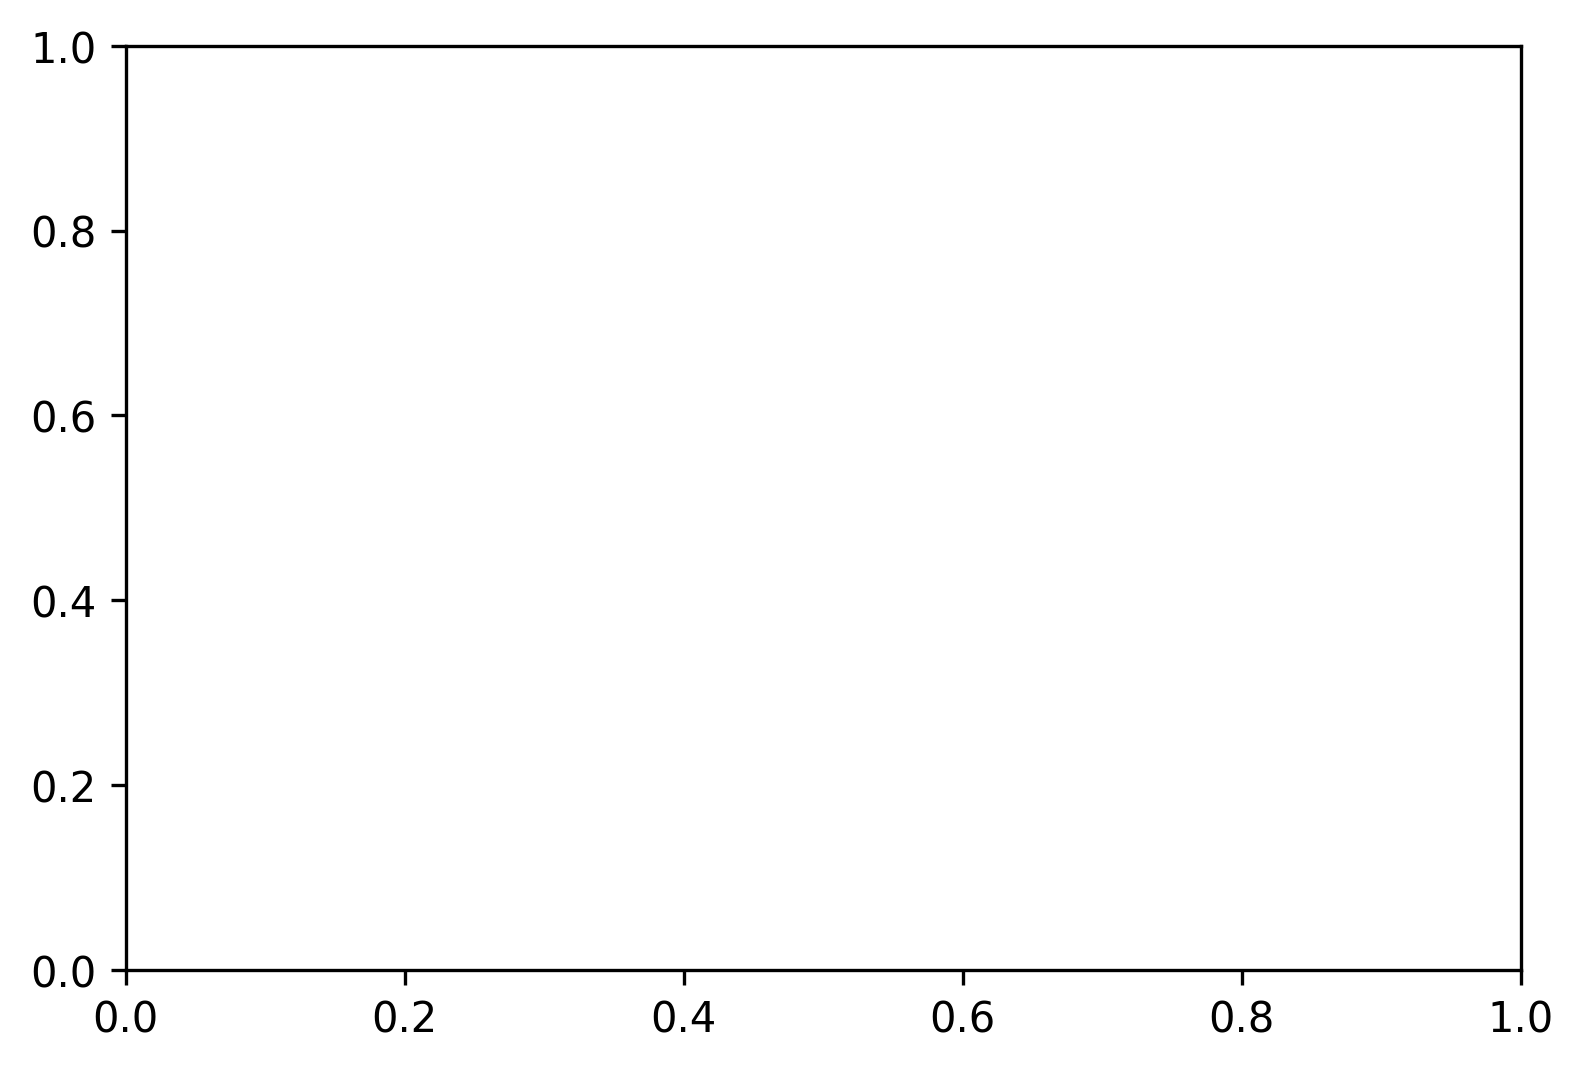

In [14]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(list(range(0,11)), KL_list, "o-")
plt.grid()
plt.xlabel("Layers")
plt.ylabel("KL-Div")
plt.yscale("log")
plt.savefig(image_path("PQC_Haar_approx_3qubits.pdf"), bbox_inches='tight')
plt.show()

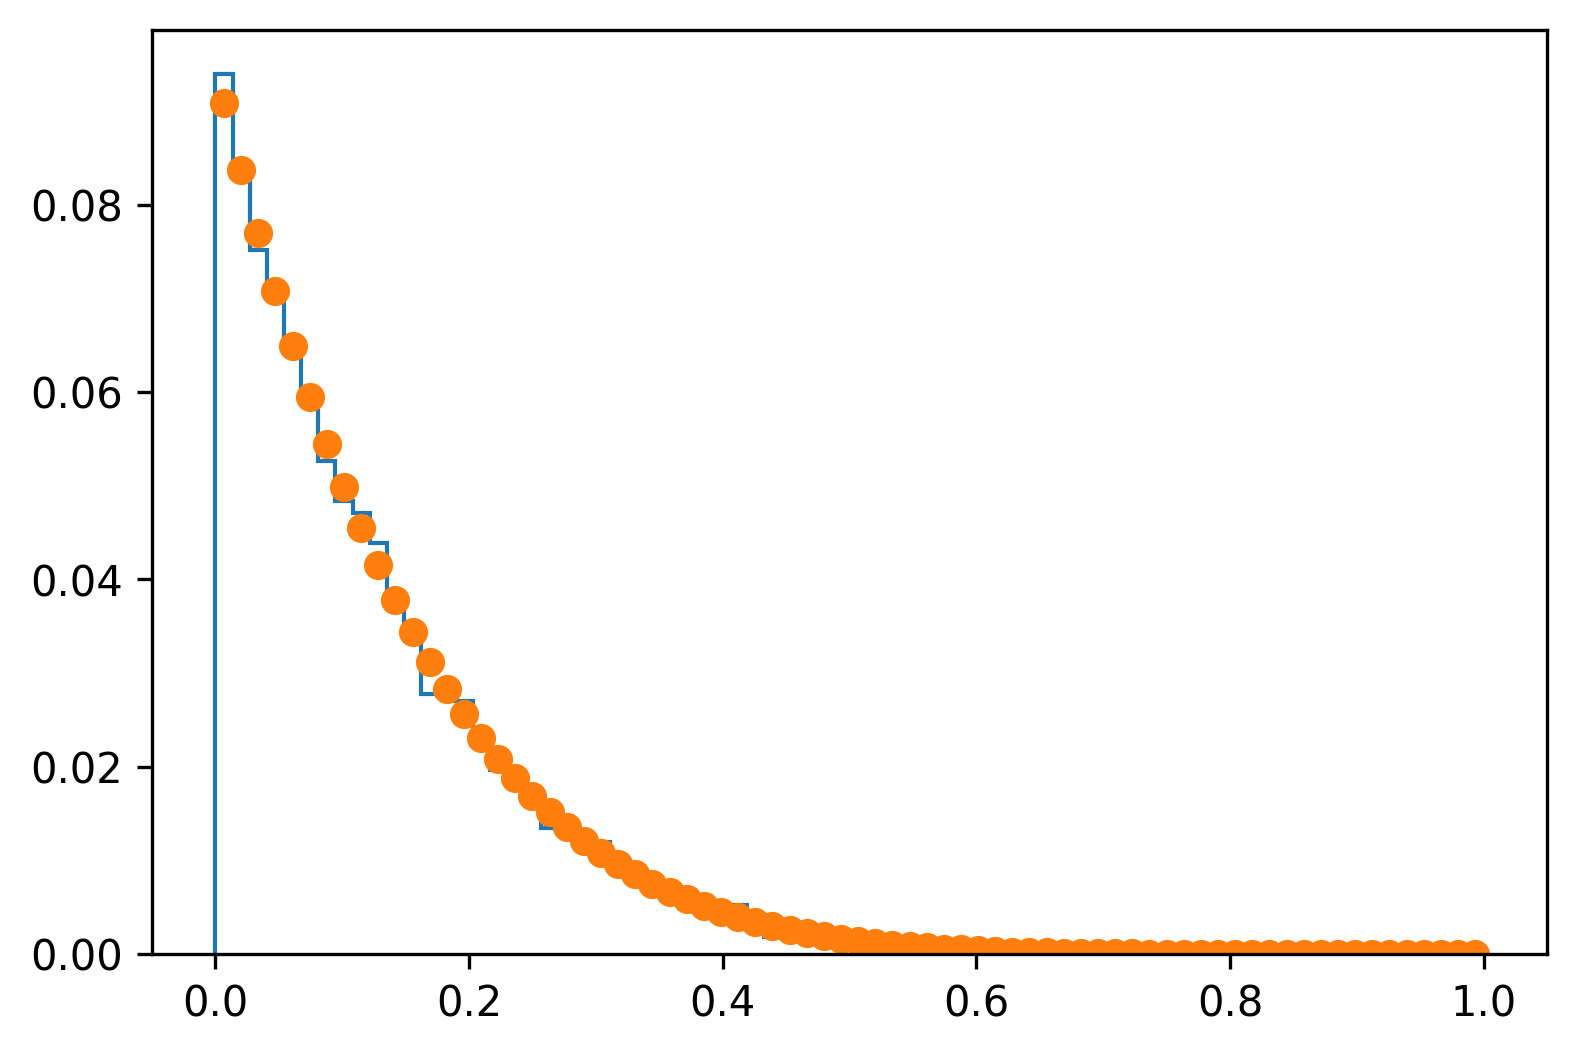

In [12]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.stairs(P_pqc, bins)
plt.plot(F, P_Haar, "o")
plt.grid()
plt.savefig(image_path("PQC_Haar_approx_3qubits.pdf"), bbox_inches='tight')
plt.show()

## Four Qubits

### Circuit Ensemble

In [9]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)


bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list = []
for L in range(0, 11):
    fid_list = []
    for i in tqdm(range(10000)):
        U1 = Operator(pqc_basic(n, L)).data
        U2 = Operator(pqc_basic(n, L)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)
    
    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    
    KL_list.append(KL)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

### Haar Ensemble

In [10]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)


bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list2 = []
for i in range(10):
    fid_list = []
    for i in tqdm(range(10000)):
        U1 = Operator(random_unitary(d)).data
        U2 = Operator(random_unitary(d)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)

    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    KL_list2.append(KL)

haar_KL_mean = np.mean(KL_list2)
haar_KL_std = np.std(KL_list2)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

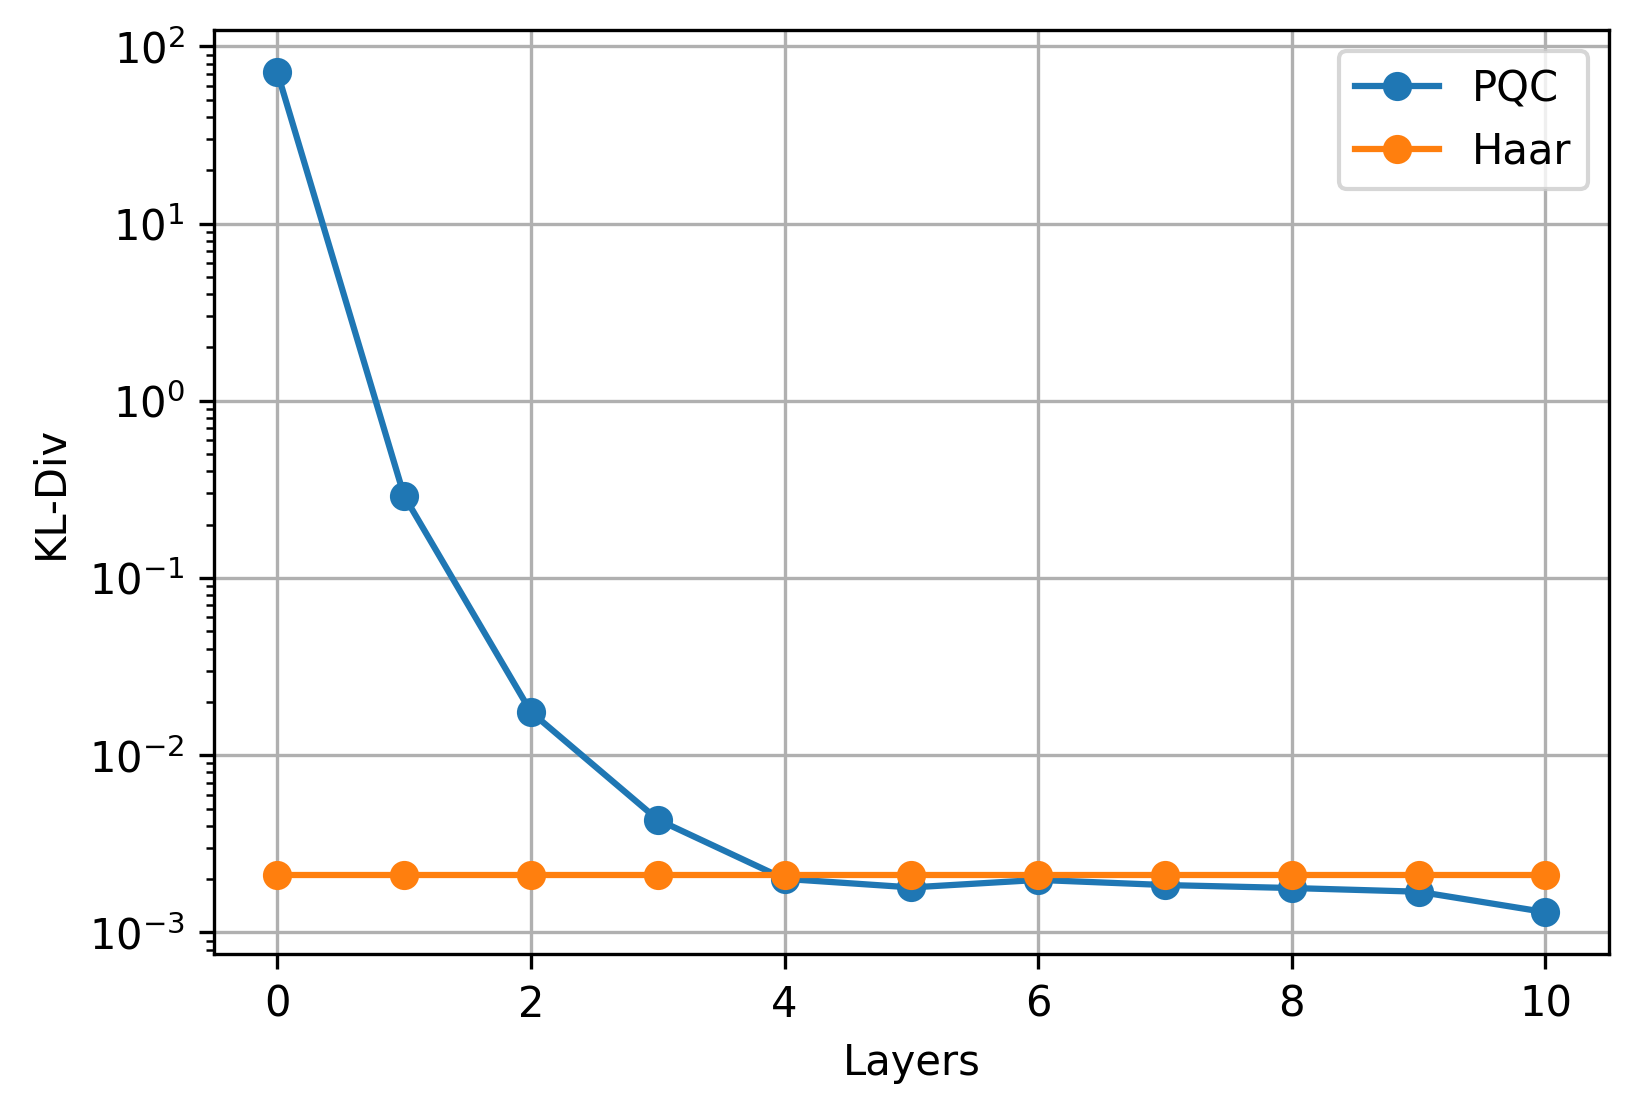

In [13]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(list(range(0,11)), KL_list, "o-")
plt.plot(list(range(0,11)), [haar_KL_mean]*11, "o-")
plt.grid()
plt.legend(["PQC", "Haar"])
plt.xlabel("Layers")
plt.ylabel("KL-Div")
plt.yscale("log")
plt.savefig("PQC_Haar_approx_4qubits.pdf", bbox_inches='tight')
plt.show()

In [14]:
np.savetxt("PQC_Haar_approx_4qubits_10Ksamples.txt", KL_list)

## Haar Finite Sampling error

In [7]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)


bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list = []
for i in range(10):
    fid_list = []
    for i in tqdm(range(10000)):
        U1 = Operator(random_unitary(d)).data
        U2 = Operator(random_unitary(d)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)

    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    KL_list.append(KL)

print(np.mean(KL_list), np.std(KL_list))

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

0.001721706425193742 0.0002832558761987544


In [6]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)


bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list = []
for i in range(10):
    fid_list = []
    for i in tqdm(range(100000)):
        U1 = Operator(random_unitary(d)).data
        U2 = Operator(random_unitary(d)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)

    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    KL_list.append(KL)

print(np.mean(KL_list), np.std(KL_list))

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

0.0002220503381219159 4.10438813862251e-05


In [20]:
KL_list

[]